In [3]:
# Write a program to do following:  
# Data Set: https://www.kaggle.com/shwetabh123/mall-customers 
# This dataset givesthe data of Income and money spent by the customers visiting a shopping 
# mall. 
# The data set contains Customer ID, Gender, Age, Annual Income, Spending Score. Therefore, asa mall owner you need to find the group of people who are the profitable customers for the 
# mallowner. Apply at least two clustering algorithms (based on Spending Score) to find thegroup ofcustomers. 
# a) Apply Data pre-processing  
# b) Perform data-preparation (Train-Test Split) 
# c) Apply Machine Learning Algorithm
# d) Evaluate Model. 
# e) Apply Cross-Validation and Evaluate Mode

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [6]:
df = pd.read_csv("Mall_Customers.csv")

In [7]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


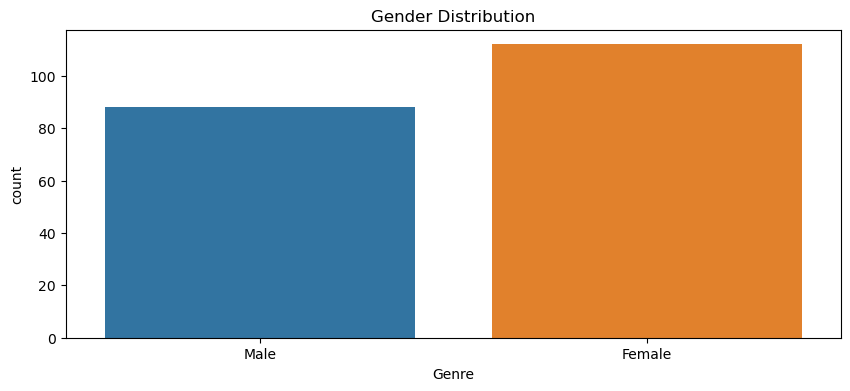

In [12]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Genre', data=df)
plt.title("Gender Distribution")
plt.show()

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


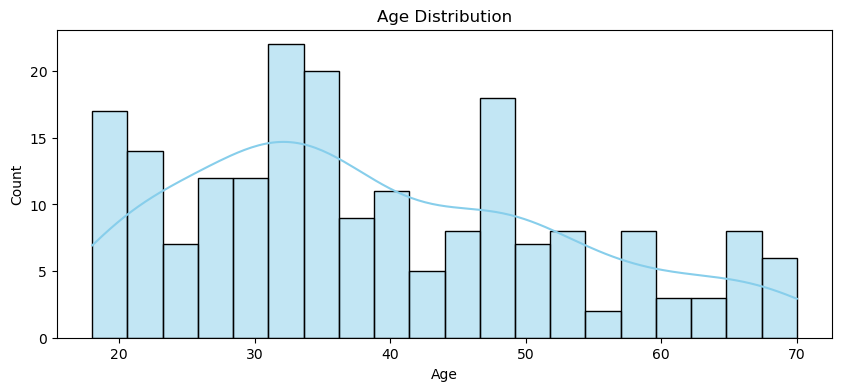

In [13]:
plt.figure(figsize=(10, 4))
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title("Age Distribution")
plt.show()

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


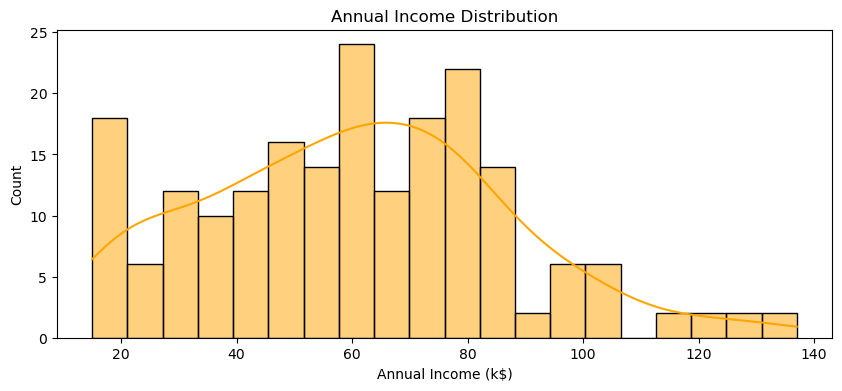

In [14]:

plt.figure(figsize=(10, 4))
sns.histplot(df['Annual Income (k$)'], kde=True, bins=20, color='orange')
plt.title("Annual Income Distribution")
plt.show()


c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


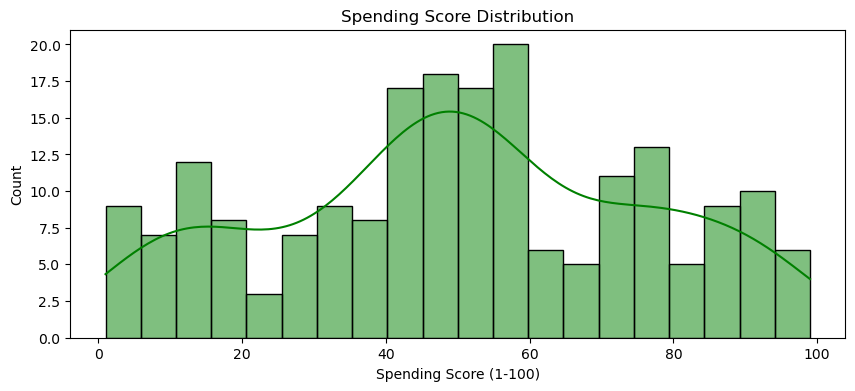

In [15]:
plt.figure(figsize=(10, 4))
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=20, color='green')
plt.title("Spending Score Distribution")
plt.show()

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


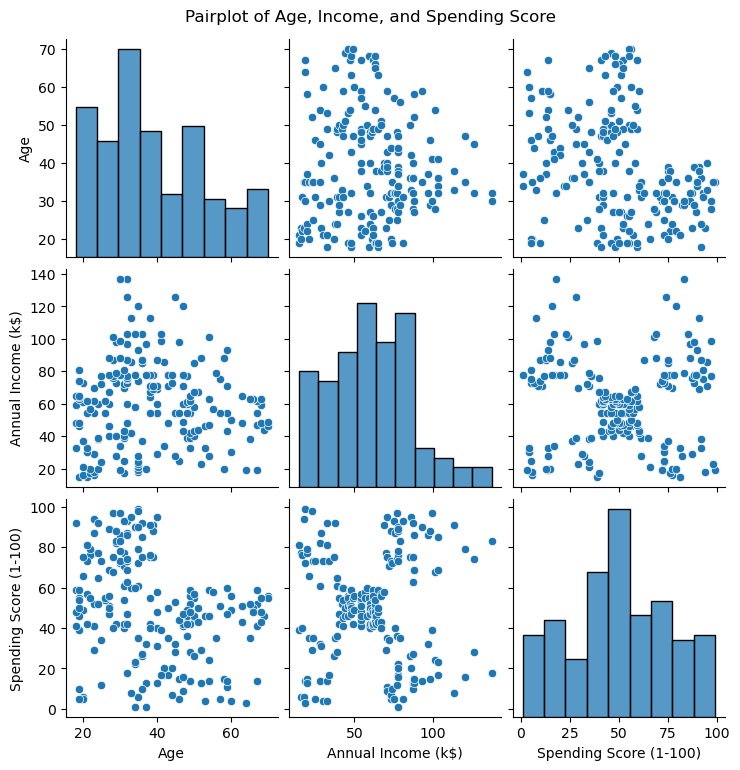

In [16]:
# Pairplot for all relationships
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle("Pairplot of Age, Income, and Spending Score", y=1.02)
plt.show()

In [17]:
# Step 3: Data Preprocessing
df = df.drop("CustomerID", axis=1)
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})

In [18]:
# Step 4: Select Features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [19]:
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Step 5: Train-Test Split
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

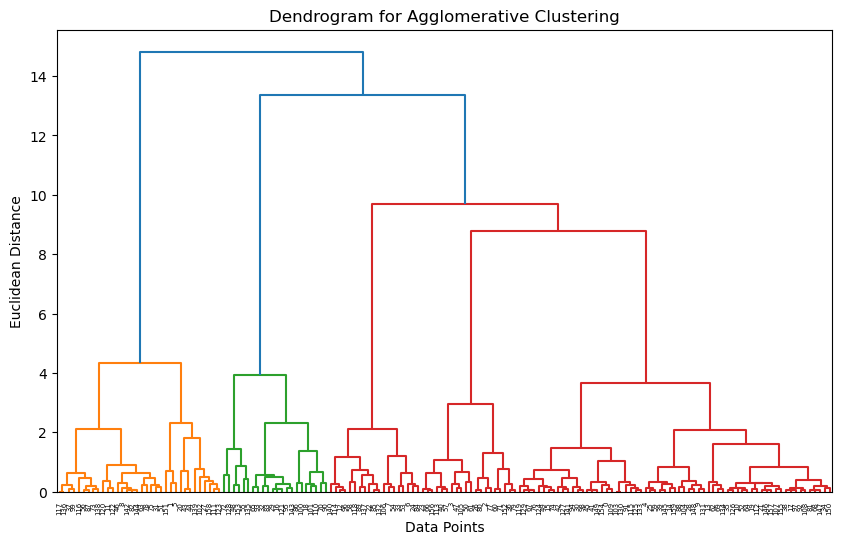

In [21]:
# Step 6: Dendrogram to decide cluster count
plt.figure(figsize=(10, 6))
linkage_matrix = linkage(X_train, method='ward')
dendrogram(linkage_matrix)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [22]:
# Step 7: Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=5)
agg_labels = agg.fit_predict(X_train)

In [23]:
# Step 8: Evaluate with Silhouette Score
sil_score = silhouette_score(X_train, agg_labels)
print("\nAgglomerative Clustering Silhouette Score:", sil_score)


Agglomerative Clustering Silhouette Score: 0.5523700957479284


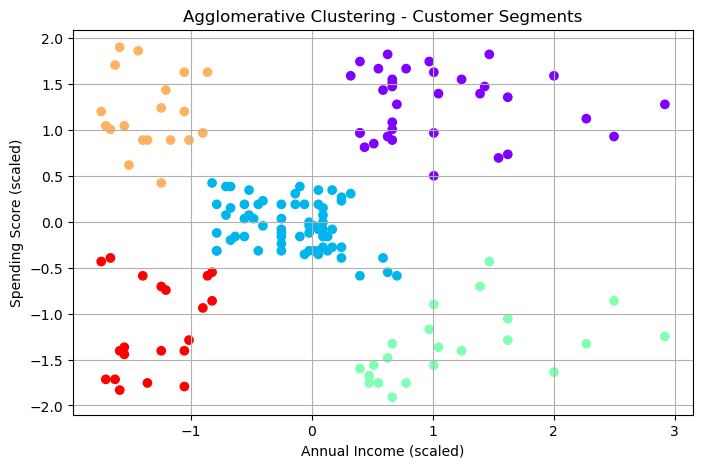

In [24]:
# Step 9: Visualize Clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_train[:, 0], X_train[:, 1], c=agg_labels, cmap='rainbow')
plt.title("Agglomerative Clustering - Customer Segments")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.grid(True)
plt.show()

In [25]:
from sklearn.cluster import KMeans

In [26]:
# Step 8: KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_train)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [27]:
kmeans_score = silhouette_score(X_train, kmeans_labels)
print("Silhouette Score - KMeans Clustering:", kmeans_score)

Silhouette Score - KMeans Clustering: 0.5509842461121202


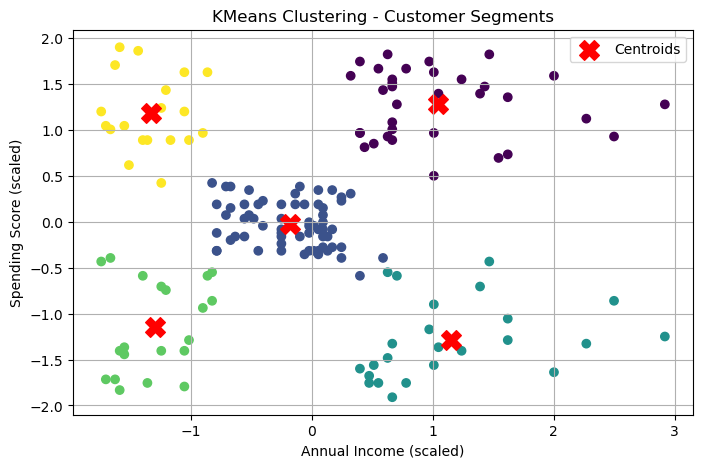

In [28]:
# Step 11: Visualize KMeans Clustering
plt.figure(figsize=(8, 5))
plt.scatter(X_train[:, 0], X_train[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.title("KMeans Clustering - Customer Segments")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend()
plt.grid(True)
plt.show()